<h2><font color="#004D7F" size=6>Modelado para MD (Parte I)</font></h2>



<h1><font color="#004D7F" size=5>Algoritmos de Machine Learning</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Ing. Miguel Carlos Pita</font><br>
<font color="#004D7F" size=3>Modelizado de Minería de Datos</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Librerías](#section11)
    * [1.2. CSV](#section12)
* [2. Algoritmos de Clasificación](#section2)
    * [2.1. Algoritmos de taxonomía lineal](#section21)
    * [2.2. Algoritmos de taxonomía no lineal](#section22)
* [3. Algoritmos de Regresión](#section3)
    * [3.1. Algoritmos de taxonomía lineal](#section31)
    * [3.2. Algoritmos de taxonomía no lineal](#section32)

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

## Algoritmos de ML

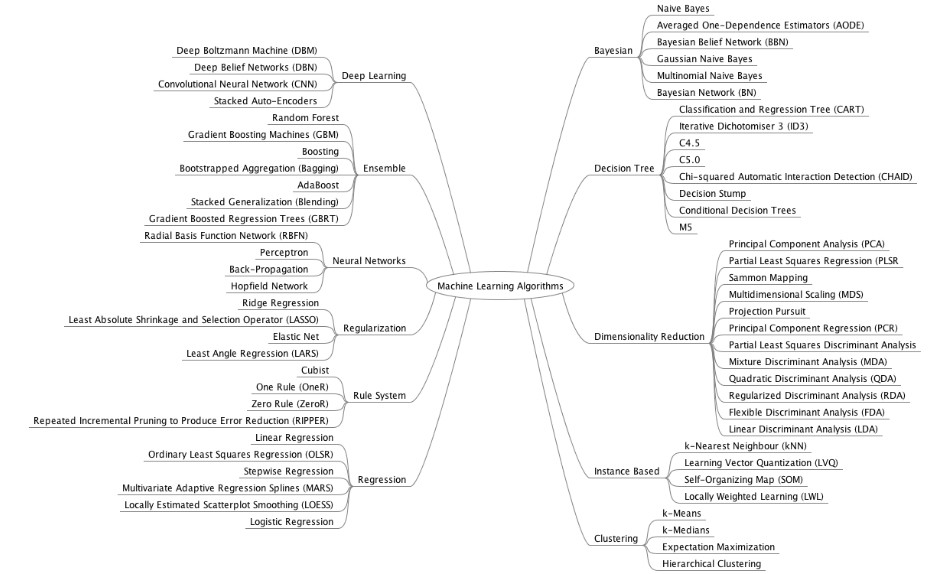

### Taxonomía de los algoritmos

La taxonomía es la ciencia de la clasificación. En el contexto de ML, es un sistema estructurado que organiza y clasifica instancias en grupos basados en sus características comunes, creando un sistema jerárquico que facilita su estudio o análisis.

* **Lineales:** El valor objetivo se expresa como una combinación lineal de valores constantes o el producto entre un parámetro (valores numéricos que el modelo ajusta durante el entrenamiento para lograr la mejor predicción posible) y una variable predictiva (características o "features"). Los algoritmos lineales son útiles cuando los datos son linealmente separables (es decir, se pueden dividir usando una línea o un plano).

    * Ejemplo: En una clasificación lineal, se busca una línea (o un plano en dimensiones mayores) que divida los datos en dos grupos, como se muestra en el gráfico A. En este caso, la línea separa dos clases representadas por puntos verdes y azules.

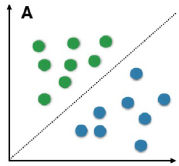

* **No lineales:** No se utilizan funciones como en los lineales, no se utiliza una combinación lineal de variables predictivas para hacer la clasificación o regresión. Estos algoritmos pueden trabajar con datos que no son linealmente separables. Son útiles cuando la relación entre las variables y el valor objetivo es compleja y no puede ser representada con una línea o plano.

    * Ejemplo: En el gráfico B, la línea de separación entre las clases es una forma circular en lugar de una línea recta, lo que indica que se ha utilizado una técnica no lineal para identificar las clases.

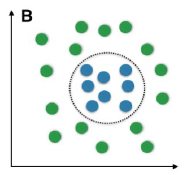

* **Ensamblados:** Combinan las predicciones de múltiples modelos para hacer predicciones más robustas. Los ensamblados también se llaman "de conjunto". Usan múltiples estimadores o algoritmos para mejorar la robustez y precisión de las predicciones. Estos algoritmos usan múltiples estimadores o algoritmos y luego combinan sus predicciones. Esto ayuda a reducir la varianza, el sesgo o ambos, y mejora la capacidad de generalización del modelo. La idea principal es que la combinación de varios modelos, especialmente si son de distintos tipos, puede ayudar a capturar mejor patrones en los datos y mejorar la precisión del modelo final.

### Qué algoritmos revisar

**Probar una mezcla de representaciones de algoritmos:** Esto significa utilizar algoritmos que representan y aprenden de los datos de diferentes maneras, para ver cuál combinación funciona mejor en tu problema.

* Basados en instancias (ya hablamos de ellos en el cuaderno "Transformación de Datos"): Cuando se quiere clasificar un nuevo objeto, se extraen los objetos más parecidos y se usa su clasificación para clasificar al nuevo objeto. Son métodos que clasifican o predicen el resultado de un nuevo dato en función de los datos más similares o "cercanos" a él.
* Árboles: Bifurcando y modelando los posibles caminos tomados y su probabilidad de ocurrencia para mejorar su precisión. Cada división se hace para aumentar la "pureza" de las clases en cada rama. En otras palabras, el algoritmo busca criterios de división que mejoren la precisión de la predicción. Estos algoritmos son útiles para detectar patrones complejos.
  
**Prueba una mezcla de algoritmos de aprendizaje**: Utilizar varios algoritmos que puedan aprender la misma representación de los datos. Esto implica probar diferentes enfoques para el mismo problema, como usar una regresión lineal y un árbol de decisión para una tarea de predicción numérica, y comparar cuál funciona mejor o combina sus resultados, o varios algoritmos de clasificación (K-NN, árboles de decisión y SVM) y ver cuál es más adecuado para clasificar tus datos.

**Prueba una mezcla de tipos de modelos** Esto significa probar modelos que representan los datos de formas diferentes y ver cuál se ajusta mejor a tu problema.

* Modelos lineales y no lineales: Los modelos lineales asumen una relación lineal entre las características y el valor objetivo, mientras que los modelos no lineales pueden capturar relaciones más complejas. Un ejemplo de modelo lineal es la regresión lineal, y un ejemplo de modelo no lineal es un árbol de decisión.

* Modelos paramétricos y no paramétricos: Los modelos paramétricos hacen suposiciones sobre la estructura de los datos (como que sigue una distribución específica). Ejemplo: regresión lineal, regresión logística. Por otra parte, los no paramétricos no hacen suposiciones fuertes sobre los datos y pueden adaptarse mejor a estructuras complejas. Ejemplo: K-NN, árboles de decisión.

En este cuaderno, vamos a analizar algunos de estos algoritmos, en especial, los de taxonomía lineal y no lineal. En cuanto a la taxonomía de conjunto o ensamblados, como los tipo boosting y bagging, los veremos posteriormente cuando ya tengamos una base sólida de estos primeros. Cada algoritmo será presentado desde dos perspectivas:
* El paquete y la función utilizados para entrenar y hacer predicciones.
* Las configuraciones en el paquete scikit-learn para cada algoritmo, estos es, la configuración de sus hiperparámetros.

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Librerías</font>

Vamos a declarar algunas librerías generales que ya hemos estado trabajando y que usaremos a lo largo del siguiente cuaderno.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

<a id="section12"></a>
## <font color="#004D7F"> 1.2. CSV</font>

* **Clasificación**: Se utilizará el conjunto de datos de Pima Indians Diabetes con una validación cruzada 10-folds para demostrar cómo verificar cada algoritmo de ML y se utilizan medidas de precisión promedio para indicar el rendimiento del algoritmo.

In [2]:
import pandas as pd
import numpy as np

In [5]:
ruta_clas = 'data/pima-indians-diabetes.data.csv'

nombres_clas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df_clas = pd.read_csv(ruta_clas, names=nombres_clas)

array_clas = df_clas.values
X_clas = array_clas[:, 0:8] # Separamos del conjunto de datos la matriz X (variables independientes)
y_clas = array_clas[:, 8] # Separamos del conjunto de datos el vector y (variable dependientes)

In [7]:
df_clas

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
array_clas

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [11]:
X_clas

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [13]:
y_clas

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

### Vemos si la clase está desbalanceada

In [15]:
# Primera forma de observar el desbalance

df_clas.groupby('class').size()

class
0    500
1    268
dtype: int64

In [17]:
# Segunda forma de observar el desbalance

df_clas['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

* **Regresión**: Para ello utilizaremos el dataset Boston House Price. Este es un problema de regresión donde todos los atributos son numéricos. Se utiliza un arnés de prueba ('test harness': conjunto de herramientas o procedimientos utilizados para entrenar, validar y probar modelos de manera estructurada y repetible) con validación cruzada 10 veces para demostrar cómo verificar cada algoritmo de aprendizaje automático y las medidas de error cuadrático medio (en su versión NMSE - Negative Mean Squared Error) se utilizan para indicar el rendimiento del algoritmo.

In [117]:
import numpy as np
import pandas as pd

ruta_reg='data/housing.csv'

nombres_reg = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_reg = pd.read_csv(ruta_reg, sep=r'\s+', names=nombres_reg)

array_reg = df_reg.values
X_reg = array_reg[:,:13]
y_reg = array_reg[:,13]

In [21]:
df_reg

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [23]:
array_reg

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [25]:
X_reg

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [27]:
y_reg

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Algoritmos de clasificación</font>

La comprobación puntual es una forma de descubrir qué algoritmos funcionan bien en su problema de ML. No puede saber qué algoritmos se adaptan mejor a su problema de antemano. Debe probar una serie de métodos y centrar la atención en los que resulten más prometedores. Veremos aquí seis algoritmos de ML que puede usar al verificar su problema de clasificación en Python con scikit-learn. Para ellos veremos dos taxonomías principales: lineal y no lineal.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Algoritmos de taxonomía lineal</font>

En general para todos los algoritmos lineales debo aplicar Box-Cox o Yeo-Johnson a los datos con sesgo ya que suponen una distribución gaussiana 
para las variables de entradas numéricas.
Vamos a revisar seis algoritmos de clasificación que puede verificar en su conjunto de datos, comenzando con dos algoritmos lineales:
* Logistic Regression (LoR).
* Linear Discriminant Analysis (LDA).

<a id="section211"></a>
### <font color="#004D7F"> 2.1.1. Logistic Regression</font>

LoR supone una distribución gaussiana para las variables de entrada numéricas (en general para todos los algoritmos lineales debo aplicar Box-Cox o Yeo-Johnson a los datos con sesgo) y puede modelar problemas de clasificación binaria. 

Este modelo ayuda a determinar si la entrada pertenece a un sector específico. Utiliza la función sigmoide (también llamada frontera de decisión) que tiene un rango de valores de salida entre 0 y 1.

La regresión logística se considera un modelo lineal porque la decisión de clasificación está basada en una combinación lineal de las características de entrada. Aunque el resultado final de la regresión logística no es una línea recta (es una curva sigmoide), el modelo en sí aplica una función lineal antes de pasarla a la función sigmoide.

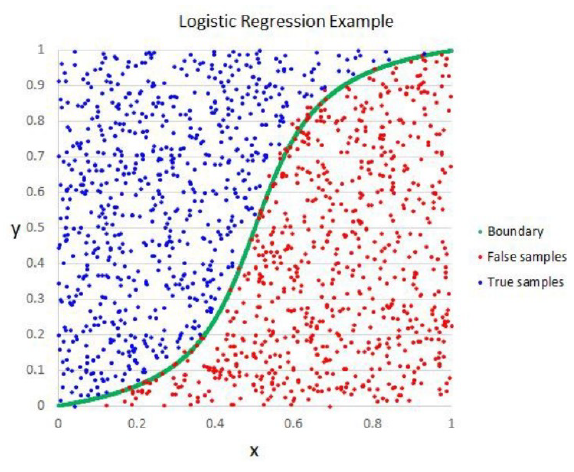

Puede construir un modelo de regresión logística utilizando la clase `LogisticRegression`.

In [53]:
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = LogisticRegression(solver='lbfgs', max_iter=1000)
resultados = cross_val_score(modelo, X_clas, y_clas, cv=kfold) # Por defecto en cross_val_score la métrica es accuracy
print(f"Accuracy: {resultados.mean()*100.0:.2f}% ({resultados.std()})")

Accuracy: 77.22% (0.0496837651757489)


<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
</div> 

**lbfgs:** Se refiere a "Limited-memory Broyden–Fletcher–Goldfarb–Shanno". Es un algoritmo de optimización que se utiliza para problemas de optimización no lineales, comúnmente utilizado en Machine Learning para ajustar modelos. Es eficiente para problemas con una gran cantidad de parámetros, lo que lo hace adecuado para la regresión logística con datasets más grandes.

**Todos los procesos descriptos a continuación (con *KFold* y *train_test_split* individualmente y utilizados en conjunto) pueden aplicarse de la misma forma en los demás modelos que veremos posteriormente, importando por supuesto el modelo correspondiente.**

### 1) Usar *cross_val_predict* para obtener predicciones con *KFold*
*cross_val_predict* realiza validación cruzada, pero en lugar de devolver solo las puntuaciones de precisión (como cross_val_score), te devuelve las predicciones de cada una de las divisiones.

In [55]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Obtener las predicciones de validación cruzada en el conjunto completo de datos
predicciones = cross_val_predict(modelo, X_clas, y_clas, cv=kfold)

# Reporte de clasificación en el conjunto completo de datos
print(classification_report(y_clas, predicciones))

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       500
         1.0       0.72      0.57      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.76       768



En este caso, predictions contendrá las clases asignadas en cada iteración de validación cruzada para cada dato.

In [57]:
resultados # Devuelve las puntuaciones de precisión obtenidas (cross_val_score)

array([0.83116883, 0.74025974, 0.74025974, 0.80519481, 0.79220779,
       0.77922078, 0.66233766, 0.80519481, 0.82894737, 0.73684211])

In [59]:
predicciones # Devuelve las predicciones de cada una de las divisiones (cross_val_predict)

array([1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0.

In [61]:
predicciones.shape

(768,)

#### Entrenar el modelo en todos los datos después de la validación cruzada
Después de realizar *KFold* y evaluar el rendimiento, puedes entrenar el modelo en el conjunto completo de datos para tener un modelo final, y luego usarlo para predecir las clases de nuevos datos.

In [63]:
# Entrenar el modelo final en todos los datos, ya que los modelos usados en cada iteración de k-fold se entrenan solo en los pliegues, no en todos los datos juntos.
modelo.fit(X_clas, y_clas)

# Hacer una predicción con nuevos datos
# Supongamos que tienes un nuevo dato (una muestra con las mismas características que el modelo espera)
nuevo_dato = [[6, 148, 72, 35, 0, 33.6, 0.627, 50]] # En este caso tomé los datos de la instancia 0 del DataFrame (Clase 1)
# El doble corchete ([[...]]) se usa porque el método predict espera que la entrada tenga la misma forma que los datos con los que fue entrenado, 
# lo que significa que necesita recibir una matriz de datos, no solo un vector.

# Usa el modelo para predecir la clase del nuevo dato
prediccion = modelo.predict(nuevo_dato)
print(f"La clase predicha para el nuevo dato es: {prediccion[0]}")

La clase predicha para el nuevo dato es: 1.0


In [65]:
prediccion

array([1.])

Si también quieres saber la probabilidad de pertenencia a cada clase, puedes usar *predict_proba()*:

In [67]:
probabilidades = modelo.predict_proba(nuevo_dato)
print(f"Probabilidades para cada clase: {probabilidades}")

Probabilidades para cada clase: [[0.28056998 0.71943002]]


Esto te dará las probabilidades de que el nuevo dato pertenezca a cada una de las clases. El modelo de regresión logística te dará una lista con las probabilidades correspondientes a cada clase en orden. Por ejemplo, si tienes dos clases (0 y 1), probabilidades[0][0] te dará la probabilidad de pertenencia a la clase 0, y probabilidades[0][1] te dará la probabilidad de pertenencia a la clase 1.

### 2) Si en lugar de usar *KFold* hubiese usado *train_test_split*

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Divide en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_clas, y_clas, test_size=0.3, random_state=42)

# Configura el modelo de regresión logística
modelo = LogisticRegression(solver='lbfgs', max_iter=1000)

# Ajusta/Entrena el modelo con los datos de entrenamiento (70% de los datos)
modelo.fit(X_train, y_train)

# Hacer predicción en el conjunto de prueba (30% de los datos)
y_pred = modelo.predict(X_test)

# Evaluar el modelo en el conjunto de prueba (30% de los datos)
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy en el conjunto de prueba: {accuracy_test*100:.2f}%")

# Entrenar con todos los datos antes de hacer una predicción real (100% de los datos -> TODO el dataset)
# De esta forma se estaría aprovechando al máximo la información para generar un modelo más robusto.
modelo.fit(X_clas, y_clas)

# Hacer una predicción con nuevos datos
# Supongamos que tienes un nuevo dato (una muestra con las mismas características que el modelo espera)
nuevo_dato = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]]) # En este caso tomé los datos de la instancia 0 del DataFrame (Clase 1)

# Usa el modelo para predecir la clase del nuevo dato
prediccion = modelo.predict(nuevo_dato)

print(f"La clase predicha para el nuevo dato es: {prediccion[0]}")

Accuracy en el conjunto de prueba: 73.59%
La clase predicha para el nuevo dato es: 1.0


Si también quieres saber la probabilidad de pertenencia a cada clase, puedes usar *predict_proba()*:

In [71]:
probabilidades = modelo.predict_proba(nuevo_dato)
print(f"Probabilidades para cada clase: {probabilidades}")

Probabilidades para cada clase: [[0.28056998 0.71943002]]


Esto te dará las probabilidades de que el nuevo dato pertenezca a cada una de las clases. El modelo de regresión logística te dará una lista con las probabilidades correspondientes a cada clase en orden. Por ejemplo, si tienes dos clases (0 y 1), probabilidades[0][0] te dará la probabilidad de pertenencia a la clase 0, y probabilidades[0][1] te dará la probabilidad de pertenencia a la clase 1.

### 3) Utilizando *train_test_split* y *KFold* en conjunto
#### Esto es lo que, de manera resumida, deberán realizar para el Trabajo Práctico

In [73]:
# 1. División inicial en Train/Test Split
# Separamos los datos en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%).
X_train, X_test, y_train, y_test = train_test_split(X_clas, y_clas, test_size=0.3, random_state=42) 
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}, Tamaño del conjunto de prueba: {X_test.shape}")

# 2. Validación cruzada (k-fold)
# Utilizamos K-Fold con 10 particiones (k=10) en el conjunto de entrenamiento para evaluar la precisión promedio del modelo mediante validación cruzada.
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
modelo = LogisticRegression(solver='lbfgs', max_iter=1000)
cv_results = cross_val_score(modelo, X_train, y_train, cv=kfold, scoring='accuracy') # El scoring por defecto para cross_val_score es accuracy. Así que, con y sin el parámetro scoring='accuracy', te darán el mismo resultado para modelos de clasificación.
print(f"Accuracy promedio en validación cruzada (k-fold): {cv_results.mean()*100:.2f}% (+/- {cv_results.std()*100:.2f}%)")

# 3. Entrenamiento final con el conjunto de entrenamiento (70% de los datos)
modelo.fit(X_train, y_train)

# 4. Evaluación con el conjunto de prueba (30% de los datos)
y_pred = modelo.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy en el conjunto de prueba: {accuracy_test*100:.2f}%")
print("Reporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_pred))

# 5. Entrenamiento con todos los datos, opcional antes de producción (100% de los datos -> TODO el dataset)
modelo.fit(X_clas, y_clas)
print("Modelo entrenado con todos los datos para un despliegue en producción.")

Tamaño del conjunto de entrenamiento: (537, 8), Tamaño del conjunto de prueba: (231, 8)
Accuracy promedio en validación cruzada (k-fold): 78.04% (+/- 5.13%)
Accuracy en el conjunto de prueba: 73.59%
Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80       151
         1.0       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Modelo entrenado con todos los datos para un despliegue en producción.


**Explicación paso a paso:**
1. División inicial en Train/Test Split:
    * Divides el dataset en dos partes: el conjunto de entrenamiento y el conjunto de prueba.
    * Esto es para evaluar la capacidad general del modelo en datos que no ha visto antes.
2. Validación cruzada (k-fold):
    * Aplicas k-fold cross-validation en el conjunto de entrenamiento para entrenar el modelo y verificar su rendimiento de manera robusta. Esto asegura que el modelo esté bien ajustado y generalice bien.
3. Entrenamiento final con el conjunto de entrenamiento:
    * Una vez que has entrenado y evaluado el modelo con validación cruzada, entrenas el modelo final con el conjunto de entrenamiento completo, para que aprenda de todos los datos de entrenamiento disponibles.
4. Evaluación con el conjunto de prueba:
    * Luego pruebas el modelo en el conjunto de prueba para asegurarte de que funcione bien en datos que no ha visto.
5. Entrenamiento con todos los datos (opcional antes de producción):
    * Finalmente, antes de desplegar el modelo en producción, **entrenas el modelo con todo el dataset** (es decir, combinas tanto el conjunto de entrenamiento como el conjunto de prueba), para aprovechar toda la información disponible en el conjunto de datos.
    * La razón para hacer esto es que, al usar todos los datos disponibles, el modelo puede aprender más información y así estar mejor preparado para las predicciones futuras. Ya que el conjunto de prueba ya se utilizó para evaluar el rendimiento, no necesitas dejar una porción sin usar si ya estás listo para poner el modelo en producción.
    * **Nota importante:** Este último paso (entrenar con todos los datos) solo se hace **después** de haber realizado todas las evaluaciones y estar seguro de que el modelo es lo suficientemente robusto, ya que entrenar con todo el conjunto de datos impide tener un conjunto "independiente" para evaluar si no lo haces cuidadosamente.

Para hacer predicciones con el modelo entrenado en nuevos datos, puedes usar el método *predict* de model:

In [75]:
# Ejemplo de nuevos datos para realizar predicciones
nuevos_datos = [[2, 120, 70, 15, 80, 25.6, 0.5, 30],  # Ejemplo de una instancia de datos
                [1, 85, 55, 20, 50, 18.0, 0.3, 22]]   # Ejemplo de otra instancia de datos

# Realizar predicciones con el modelo entrenado con todos los datos
predicciones_nuevos_datos = modelo.predict(nuevos_datos)
print("Predicciones para nuevos datos:", predicciones_nuevos_datos)

Predicciones para nuevos datos: [0. 0.]


Si también quieres saber la probabilidad de pertenencia a cada clase, puedes usar *predict_proba()*:

In [77]:
probabilidades = modelo.predict_proba(nuevos_datos)
print(f"Probabilidades para cada clase: {probabilidades}")

Probabilidades para cada clase: [[0.85085679 0.14914321]
 [0.97872467 0.02127533]]


<a id="section212"></a>
### <font color="#004D7F"> 2.1.2. Linear Discriminant Analysis</font>

Linear Discriminant Analysis (LDA) es una técnica estadística para la clasificación binaria y multiclase. También supone una distribución gaussiana para las variables de entrada numéricas (en general para todos los algoritmos lineales debo aplicar Box-Cox o Yeo-Johnson a los datos con sesgo). LDA es un método de clasificación supervisado (el modelo se entrena con datos etiquetados) que se utiliza para encontrar una combinación lineal de características que separa o discrimina de la mejor manera posible entre diferentes clases en un conjunto de datos. Proyecta los datos en dimensiones de manera de conseguir una buena proyección de acuerdo a la persepectiva desde la cual se está mirando y de esa manera poder clasificar de la mejor manera posible.

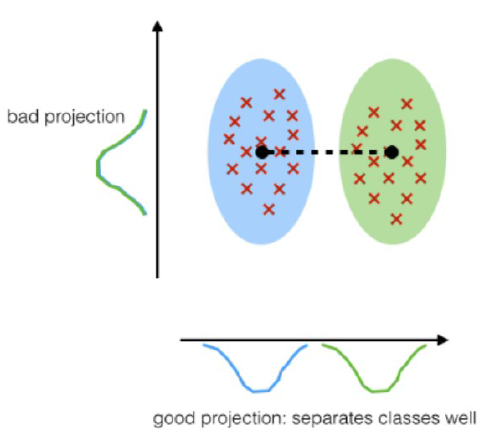

Imagina que tienes datos de dos clases (digamos, "Clase A" y "Clase B") que están distribuidos en un espacio bidimensional (con dos características). LDA intentará encontrar una línea o un plano que maximice la separación entre ambas clases. Luego, proyectará los datos en esta línea, lo cual facilita que se puedan clasificar correctamente según su posición en esta proyección.

LDA crea un modelo de clasificación en el que los nuevos datos pueden proyectarse en las direcciones discriminantes obtenidas y luego clasificarse en la clase a la que estén más cerca en el espacio proyectado.

Puede construir un modelo LDA utilizando la clase `LinearDiscriminantAnalysis`.

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = LinearDiscriminantAnalysis()
resultados = cross_val_score(modelo, X_clas, y_clas, cv=kfold) # Por defecto en cross_val_score la métrica es accuracy
print(f"Accuracy: {resultados.mean()*100.0:.2f}% ({resultados.std()})")

Accuracy: 76.70% (0.04796563054016723)


Vemos que el accuracy empeoró un poco con respecto a la regresión logística.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`LinearDiscriminantAnalysis`](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html).
</div> 

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Algoritmos de taxonomía no lineal</font>

En este caso vamos a estudiar cuatro algoritmos de Machine Learning no lineales:
* $k$-Nearest Neighbors ($k$-NN).
* Naive Bayes (NB).
* Classification and Regression Trees (CART). 
* Support Vector Machines (SVM). 

<a id="section221"></a>
### <font color="#004D7F"> 2.2.1. $k$-Nearest Neighbours</font>

El algoritmo $k$-Nearest Neighbours _($k$-NN)_ utiliza una métrica de distancia (las métricas de distancia están explicadas en detalle en el apartado de regresión _3.2.1 $k$-Nearest Neighbours_) para encontrar las $k$ instancias más similares en los datos de entrenamiento para una nueva instancia y, para problemas de clasificación, se cuenta la frecuencia de las clases entre los $k$ vecinos y se asigna la clase más común como la predicción.

Clasifica la entrada basándose en una medida de similitud, que a menudo es la distancia en el espacio de los puntos de datos. Se hace una predicción eligiendo la clase más frecuente entre los $k$ vecinos más cercanos.


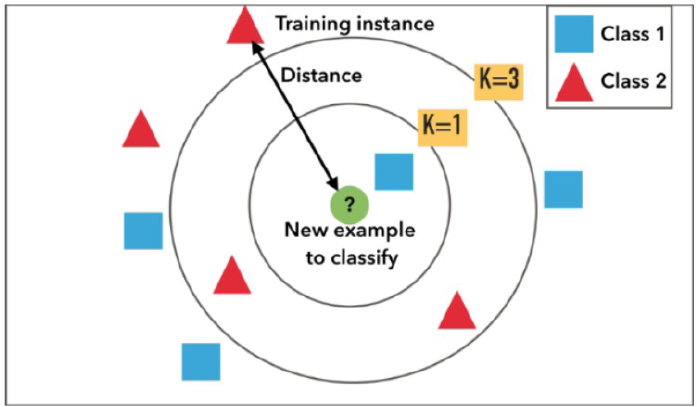

En este tipo de algoritmos son muy importantes los hiperparámetros. Es bueno que se analice para cada algoritmo su librería en particular y se vaya probando con todos los hiperparámetros el rendimiento de nuestro modelo. No es lo mismo un k=1 que hará que me compare la nueva muestra con 1 sólo vecino (será cuadrado o Clase 1 en este caso), que un k=3 que hará que se compare la nueva muestra con 3 vecinos (será triángulo o Clase 2 en este caso). Tenemos que ver con qué valor de k optimizamos nuestro modelo y que tenga un mejor rendimiento. k nunca puede ser un valor par ya que de esa forma si la nueva muestra se compara con los vecinos mas cercanos, y una es un cuadrado y la otra es un triángulo, la clasificación no va a poder hacerse.

Puede construir un modelo $k$-NN utilizando la clase `KNeighborsClassifier`.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = KNeighborsClassifier()
resultados = cross_val_score(modelo, X_clas, y_clas, cv=kfold) # Por defecto en cross_val_score la métrica es accuracy
print(f"Accuracy: {resultados.mean()*100.0:.2f}% ({resultados.std()})")

Accuracy: 71.10% (0.0507915093681296)


Si modificamos algunos hiperparámetros (pueden verse los hiperparámetros en la documentación oficial de la librería):

In [15]:
from sklearn.neighbors import KNeighborsClassifier

k = 3

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = KNeighborsClassifier(n_neighbors= k)
resultados = cross_val_score(modelo, X_clas, y_clas, cv=kfold) # Por defecto en cross_val_score la métrica es accuracy
print(f"Accuracy: {resultados.mean()*100.0:.2f}% ({resultados.std()})")

Accuracy: 68.89% (0.059857515891829687)


Vemos que empeora el rendimiento del modelo.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

k = 11

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = KNeighborsClassifier(n_neighbors= k)
resultados = cross_val_score(modelo, X_clas, y_clas, cv=kfold) # Por defecto en cross_val_score la métrica es accuracy
print(f"Accuracy: {resultados.mean()*100.0:.2f}% ({resultados.std()})")

Accuracy: 73.30% (0.05531106222390283)


Vemos que mejora el rendimiento del modelo.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
</div> 

<a id="section222"></a>
### <font color="#004D7F"> 2.2.2. Naive Bayes</font>

Naive Bayes es un algoritmo de clasificación que se basa en el Teorema de Bayes y en la suposición de independencia entre las características. Calcula la probabilidad de cada clase y la probabilidad condicional de cada clase dado cada valor de entrada. 

El Teorema de Bayes nos dice que la probabilidad de que ocurra un evento $A$ dado que ya ha ocurrido otro evento $B$ se puede calcular usando:

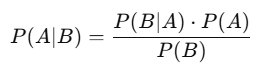

En el contexto de Naive Bayes, este teorema se utiliza para estimar la probabilidad de una clase ($C$) dada una característica o conjunto de características ($X$).

Para cada clase $C$, Naive Bayes calcula:

* $P(C)$: La probabilidad de la clase (frecuencia de la clase en el conjunto de datos). Por ejemplo, si en un conjunto de datos tenemos 100 ejemplos y 40 de ellos pertenecen a la clase $C=1$, entonces: $P(C=1)=40/100=0.4$
* $P(X|C)$: La probabilidad condicional de las características dada la clase, lo que es la probabilidad de observar ciertos valores de las características si sabemos que la observación pertenece a una clase específica.

Estas probabilidades se estiman para datos nuevos y se multiplican juntos, suponiendo que todas sean independientes (una suposición simple o ingenua). 

Para un conjunto de características $X = (x_1, x_2, \dots, x_n)$, la probabilidad de que una observación pertenezca a una clase específica $C$ es:

$ P(C|X) \propto P(C) \cdot P(x_1|C) \cdot P(x_2|C) \cdot \dots \cdot P(x_n|C)$

$P(C|X)$ es la probabilidad posterior de la clase $C$ dado un conjunto completo de características $X = (x_1, x_2, \dots, x_n)$. En otras palabras, es la probabilidad de que la observación pertenezca a la clase $C$ dado todo el conjunto de características o valores de entrada $X$. Este es el valor que el clasificador de Naive Bayes quiere calcular para decidir a qué clase asignar una nueva observación.

Para clasificar un nuevo dato, Naive Bayes calcula $P(C|X)$ para cada clase $C$ y elige la clase con la mayor probabilidad. 

Naive Bayes asume que cada característica es independiente de las demás en relación con la variable objetivo, es decir, que conocer el valor de una característica no nos da información adicional sobre el valor de otra característica. Esta es una suposición “ingenua” (naive), ya que en la práctica las características suelen estar correlacionadas. Sin embargo, esta suposición simplifica los cálculos y funciona muy bien en muchos casos. Cuando se trabaja con datos de valor real, se supone que una distribución gaussiana (normal) estima fácilmente las probabilidades para las variables de entrada utilizando la función de densidad de probabilidad gaussiana. 

En este teorema las fronteras no son rígidas, el algoritmo no crea límites exactos o definidos entre las clases, como lo harían otros modelos de clasificación (por ejemplo, un árbol de decisión o una máquina de soporte vectorial). En lugar de eso Naive Bayes calcula probabilidades para cada clase, y asigna la clase con la mayor probabilidad.

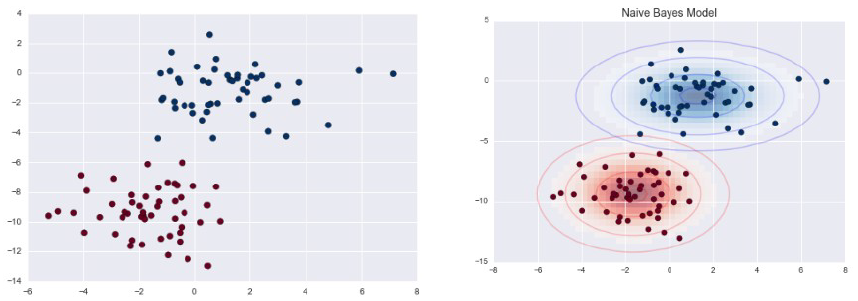

Puedes construir un modelo Naive Bayes usando la clase `GaussianNB`.

In [81]:
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
modelo = GaussianNB()
results = cross_val_score(modelo, X_clas, y_clas, cv=kfold)
print(f"Accuracy: {results.mean()*100.0:.2f}% ({results.std()})")

Accuracy: 75.91% (0.03895993346035058)


Aumenta el rendimiento del modelo en comparación con k-NN. No tiene gran cantidad de hiperparámetros a configurar.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).
</div> 

<a id="section223"></a>
### <font color="#004D7F"> 2.2.3. Classification and Regression Trees</font>

Los árboles de clasificación y regresión (CART) construyen un árbol binario a partir de los datos de entrenamiento. Los puntos divididos se eligen con avidez (estrategia voraz, eligiendo la variable óptima para ese momento, sin considerar el impacto a largo plazo) evaluando cada atributo y cada valor de cada atributo en los datos de entrenamiento para minimizar una función de costo (como el índice de Gini). 

Son modelos predictivos que colocan las observaciones realizadas a partir de los datos en las ramas; estos conducen a las hojas que están etiquetadas con la clasificación correcta. Puede caerse en overfitting con una gran profundidad. La profundidad del árbol se limita con el parámetro 'depth'.

Utiliza un conjunto discreto de valores, y las hojas producen el resultado final. 

Los árboles de decisión funcionan dividiendo los datos en función de ciertos valores de los atributos para crear ramas en el árbol. Aunque algunos árboles de decisión pueden manejar atributos categóricos directamente, es común que los algoritmos modernos (como el implementado en scikit-learn) tengan mejor comportamiento con atributos discretos, manejando mejor valores numéricos. La recomendación es convertir los atributos categóricos en valores numéricos binarios. Esto se hace creando variables dummy (o codificación one-hot). Se llaman variables "dummy" porque son variables ficticias o indicadoras que representan categorías de forma numérica. Cada categoría de un atributo se convierte en una columna, y se le asigna un valor de 1 (si la instancia pertenece a esa categoría) o 0 (si no pertenece). Lo que se hace en este caso es convertir los atributos categóricos a 0 y 1 para que el árbol vaya armando sus ramas en función de estas clasificaciones.

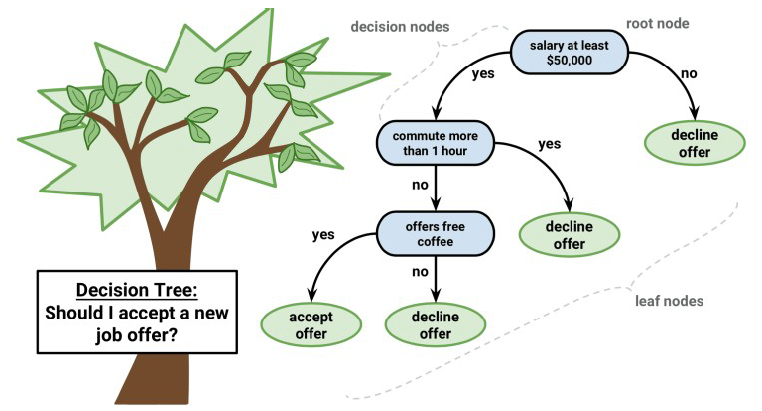

Puedes construir un modelo CART usando la clase `DecisionTreeClassifier`.

In [27]:
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = DecisionTreeClassifier(random_state=7)
resultados = cross_val_score(modelo, X_clas, y_clas, cv=kfold) # Por defecto en cross_val_score la métrica es accuracy
print(f"Accuracy: {resultados.mean()*100.0:.2f}% ({resultados.std()})")

Accuracy: 69.41% (0.03936136384286375)


Si modificamos algunos hiperparámetros (pueden verse los hiperparámetros en la documentación oficial de la librería):

In [29]:
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = DecisionTreeClassifier(criterion='entropy', random_state=7)
resultados = cross_val_score(modelo, X_clas, y_clas, cv=kfold) # Por defecto en cross_val_score la métrica es accuracy
print(f"Accuracy: {resultados.mean()*100.0:.2f}% ({resultados.std()})")

Accuracy: 69.28% (0.03985235353150276)


Vemos que empeora el rendimiento del modelo.

In [33]:
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = DecisionTreeClassifier(splitter='random', random_state=7)
resultados = cross_val_score(modelo, X_clas, y_clas, cv=kfold) # Por defecto en cross_val_score la métrica es accuracy
print(f"Accuracy: {resultados.mean()*100.0:.2f}% ({resultados.std()})")

Accuracy: 69.27% (0.04188832806883775)


Vemos que empeora el rendimiento del modelo.

In [35]:
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = DecisionTreeClassifier(max_features='sqrt', random_state=7)
resultados = cross_val_score(modelo, X_clas, y_clas, cv=kfold) # Por defecto en cross_val_score la métrica es accuracy
print(f"Accuracy: {resultados.mean()*100.0:.2f}% ({resultados.std()})")

Accuracy: 69.68% (0.057512369530114765)


Vemos que mejora el rendimiento del modelo.

In [37]:
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = DecisionTreeClassifier(max_features='log2', random_state=7)
resultados = cross_val_score(modelo, X_clas, y_clas, cv=kfold) # Por defecto en cross_val_score la métrica es accuracy
print(f"Accuracy: {resultados.mean()*100.0:.2f}% ({resultados.std()})")

Accuracy: 70.97% (0.04135029052453475)


Vemos que mejora el rendimiento del modelo.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
</div> 

<a id="section224"></a>
### <font color="#004D7F"> 2.2.4. Support Vector Machine</font>

Support Vector Machine (SVM) buscan una línea que separe mejor dos clases. Las instancias de datos más cercanas a la línea que mejor separan las clases se denominan vectores de soporte e influyen en el lugar donde se ubica la línea. 

Es decir, dados los datos en el espacio, SVM construye hiperplanos en un espacio de alta dimensión con una brecha máxima entre ellos. Los puntos dentro de ese hiperplano pertenecerán a una clase, mientras que los que están fuera pertenecerán a otra clase.

SVM se ha extendido para admitir múltiples clases. 

De particular importancia es el uso de diferentes funciones del núcleo (kernel) a través del parámetro del núcleo. 

Cada kernel es una función que define cómo proyectar los datos en un espacio de mayor dimensión, ayudando al modelo a encontrar la mejor separación (en clasificación) o la mejor aproximación (en regresión) para los datos.

Por defecto, se utiliza una potente función de base radial conocido como RBF. Los kernel pueden ser del tipo *linear* para relaciones lineales, *poly* que es adecuado para relaciones polinómicas no lineales y que puede ser de distinto grado: 1, 2, 3,..., *rbf* que proviene de Radial Basis Function que es uno de los más comunes y el más potente, adecuado para relaciones complejas y no lineales), etc....

Para una visualización intuitiva de los diferentes tipos de kernel y para comprender mejor su funcionamiento y sus parámetros (por ejemplo el parámetro *gamma* que veremos a continuación en las celdas de código siguientes), acceder al siguiente enlace:

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py

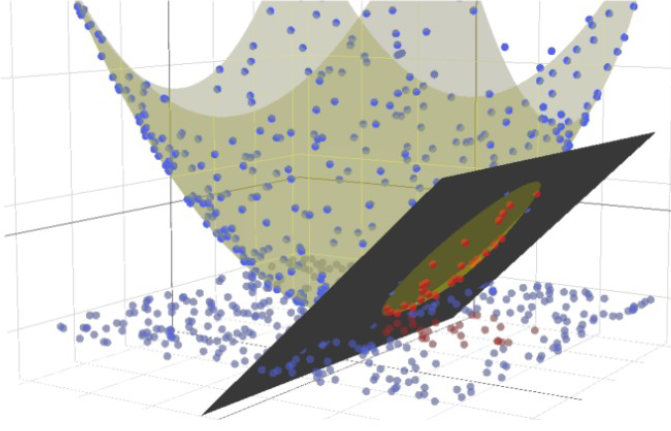

Esta es una representación para 3 características + la clase. Si tengo n características + la clase, tendré n dimensiones.

Para SVM es bueno que hagamos una Normalización (Escalamiento con Min-Max Scaler) o Estandarización de los datos (StandardScaler), para intentar disminuir las distancias entre características. Si bien la librería scikit-learn lo hace por defecto, es bueno que nosotros también lo hagamos porque por ejemplo otros lenguajes como Weka o R no lo hacen.

Puedes construir un modelo SVM usando la clase `SVC`.

In [103]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
modelo = SVC(gamma='scale') # Por defecto el gamma es 'scale'. El parámetro controla el coeficiente de kernel para 'rbf', 'poly' y 'sigmoid'.
# Si gamma='scale' (predeterminado), se utiliza "1 / (n_features * X.var())" como valor de gamma.
resultados = cross_val_score(modelo, X_clas, y_clas, cv=kfold)
print(f"Accuracy: {resultados.mean()*100.0:.2f}% ({resultados.std()})")

Accuracy: 76.05% (0.03471186731025681)


Si modificamos algunos hiperparámetros (pueden verse los hiperparámetros en la documentación oficial de la librería):

In [105]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
modelo = SVC(kernel='poly') # Por defecto el kernel es 'rbf'. El parámetro especifica el tipo de núcleo que se utilizará en el algoritmo.
resultados = cross_val_score(modelo, X_clas, y_clas, cv=kfold)
print(f"Accuracy: {resultados.mean()*100.0:.2f}% ({resultados.std()})")

Accuracy: 76.18% (0.04492925772554402)


Vemos que mejora el rendimiento del modelo.

In [107]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
modelo = SVC(kernel='poly', degree=4) # Puedo sumarle grados a la función polinomial (para kernel='poly', por defecto degree=3, no agregarle muchos ya que se torna pesado el algoritmo).
resultados = cross_val_score(modelo, X_clas, y_clas, cv=kfold)
print(f"Accuracy: {resultados.mean()*100.0:.2f}% ({resultados.std()})")

Accuracy: 75.40% (0.04334170269698442)


Vemos que empeora el rendimiento del modelo.

In [111]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
modelo = SVC(kernel='sigmoid') # Por defecto el kernel es 'rbf'. El parámetro especifica el tipo de núcleo que se utilizará en el algoritmo.
resultados = cross_val_score(modelo, X_clas, y_clas, cv=kfold)
print(f"Accuracy: {resultados.mean()*100.0:.2f}% ({resultados.std()})")

Accuracy: 49.22% (0.04943205871675282)


Vemos que empeora mucho el rendimiento del modelo

In [113]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
modelo = SVC(kernel='linear') # Por defecto el kernel es 'rbf'. El parámetro especifica el tipo de núcleo que se utilizará en el algoritmo.
resultados = cross_val_score(modelo, X_clas, y_clas, cv=kfold)
print(f"Accuracy: {resultados.mean()*100.0:.2f}% ({resultados.std()})")

Accuracy: 77.08% (0.03832392703883875)


Vemos que mejora el rendimiento del modelo.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
</div> 

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Algoritmos de Regresión</font>


Se estudiarán siete algoritmos de regresión de Machine Learning que puede usar al verificar su problema de regresión en Python con scikit-learn. La idea es ver que algoritmos se comportan mejor para nuestro conjunto de datos. Al igual que en clasificación, para regresión veremos dos taxonomías principales: lineal y no lineal.

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Algoritmos de taxonomía lineal</font>

En general para todos los algoritmos lineales debo aplicar Box-Cox o Yeo-Johnson a los datos con sesgo ya que suponen una distribución gaussiana para las variables de entrada numéricas. Comenzamos con cuatro algoritmos lineales:
* Linear Regression (LiR).
* Ridge Regression (RiR).
* LASSO Linear Regression (LASSO). 
* Elastic Net Regression (ENR).

<a id="section311"></a>
### <font color="#004D7F"> 3.1.1. Linear Regression</font>

LiR es una aproximación para modelar la relación entre una variable escalar dependiente ‘y’ y una o mas variables explicativas nombradas con ‘X’. En otras palabras, este modelo lo que realiza es “dibujar una recta” que nos indicará la tendencia de un conjunto de datos continuo. 

Supone que las variables de entrada tienen una distribución gaussiana (en general para todos los algoritmos lineales debo aplicar Box-Cox o Yeo-Johnson a los datos con sesgo). También se supone que las variables de entrada son relevantes para la variable de salida y que no están altamente correlacionadas entre sí (problema de la colinealidad), por ende deben eliminarse aquellas variables que tengan correlación baja con la variable de salida y además eliminarse una de las variables de aquellos pares que presenten alta correlación entre sí. 

En una regresión lineal simple (LiR), el objetivo es encontrar una línea (o plano, en dimensiones mayores) que minimice el error entre las predicciones y los valores reales. Este error se mide con el error cuadrático medio (Mean Squared Error - MSE).

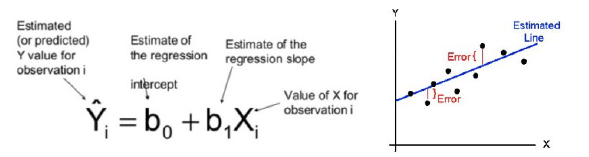

Puede construir un modelo de LiR utilizando la clase `LinearRegression`.

In [9]:
from sklearn.linear_model import LinearRegression

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = LinearRegression()
scoring = 'neg_mean_squared_error'
resultados = cross_val_score(modelo, X_reg, y_reg, cv=kfold, scoring=scoring)
print(f"Neg MSE: {resultados.mean()} ({resultados.std()})")

Neg MSE: -23.74650181131339 (11.143430110698056)


<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
</div> 

<a id="section312"></a>
### <font color="#004D7F"> 3.1.2. Ridge Regression</font>

#### ¿Qué son los coeficientes en un modelo de regresión?

En cualquier regresión lineal (como **Lasso** y **Ridge**), el modelo busca una ecuación de la forma:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

Los **coeficientes:** 
$$
(\beta_1, \beta_2, \dots, \beta_n)
$$
indican cuánto influye cada variable independiente en la predicción. Es decir, son los **pesos** que el modelo asigna a cada variable.

Si: 
$$
\beta_2 = 3
$$ 
significa que por cada unidad que aumenta 
$x_2$, el valor predicho aumenta en 3 (suponiendo que las demás se mantienen fijas).

#### ¿Por qué es importante?

- Si un coeficiente es **grande**, esa variable tiene mucha influencia en el resultado.
- En **Lasso**, si un coeficiente es **cero**, la variable **no se usa en el modelo** (hace selección automática de variables).
- En **Ridge**, los coeficientes se **achican** pero **siempre están presentes**.

Ridge Regresion (RiR) es una extensión de LiR donde la función de pérdida (el error que queremos minimizar) se modifica, para minimizar la complejidad del modelo medido, como el valor de la suma cuadrática de los valores de los coeficientes (también llamada norma __L2__). 

La Regresión Ridge (RiR) es una extensión de la regresión lineal. La diferencia clave es que, además de minimizar el error de predicción (como en LiR), Ridge también busca que los coeficientes del modelo sean lo más pequeños posibles.

La función de pérdida en Ridge es:



Si bien el término MSE es el mismo que en la regresión lineal, en la Regresión Ridge, se añade un término extra a la función de pérdida que penaliza la magnitud de los coeficientes. El término adicional que se suma es: 

$α∑(coeficientes^2)$

Esto se llama penalización L2 o norma L2. Es la suma cuadrada de los coeficientes del modelo, lo que significa que el modelo penaliza los coeficientes grandes. Por otra parte, donde $α$ es un parámetro que controla la fuerza de esta penalización. Cuanto mayor sea $α$, más se penalizan los coeficientes grandes.

Esto es útil porque, si los coeficientes se hacen muy grandes, puede generar sobreajuste (overfitting), donde el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a datos nuevos. Por ende Ridge ayuda a reducir el sobreajuste al imponer una restricción en el tamaño de los coeficientes, forzando al modelo a ser más sencillo.

Puede construir un modelo RiR utilizando la clase `Ridge`.

In [11]:
from sklearn.linear_model import Ridge

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = Ridge()
scoring = 'neg_mean_squared_error'
resultados = cross_val_score(modelo, X_reg, y_reg, cv=kfold, scoring=scoring)
print(f"Neg MSE: {resultados.mean()} ({resultados.std()})")

Neg MSE: -23.889890185053417 (11.4073341967367)


Nos da un poco más de error que la regresión lineal, por ende tendría un peor comportamiento que LiR.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html).
</div> 

<a id="section313"></a>
### <font color="#004D7F"> 3.1.3. LASSO Regression</font>

LASSO es una modificación de LiR, como RiR, donde la función de pérdida se modifica, para minimizar la complejidad del modelo medido, como el valor absoluto de los valores de los coeficientes (también llamada la norma __L1__). Mientras que Ridge penaliza los coeficientes grandes mediante la suma cuadrada de los coeficientes (norma L2), LASSO penaliza utilizando la suma de los valores absolutos de los coeficientes (norma L1). Esta diferencia tiene un efecto importante en el comportamiento del modelo.

La función de pérdida en LASSO es:

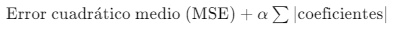

La penalización L1 tiene una propiedad interesante: puede hacer que algunos coeficientes se vuelvan exactamente cero. Esto significa que LASSO no solo ajusta los coeficientes para minimizar el error, sino que también puede eliminar completamente algunas variables del modelo. 

LASSO es especialmente útil cuando se tiene un conjunto de datos con muchas características, pero se sospecha que solo algunas de ellas son importantes. LASSO selecciona automáticamente las características más relevantes y asigna coeficientes cero a las que no son útiles. Esto hace que LASSO no solo sea un modelo de regresión, sino también una técnica de selección de características.

Relacionado con la selección de características:

* **LASSO (L1 Regularization):** Es particularmente útil para la selección de características porque la penalización L1 tiende a reducir a cero los coeficientes de las características menos importantes, lo que efectivamente las elimina del modelo. Esto ayuda a simplificar el modelo y conservar solo las características más relevantes.

* **RIDGE (L2 Regularization):** No es ideal para la selección de características, ya que la penalización L2 tiende a reducir los coeficientes de características menos importantes sin llevarlos a cero. Esto significa que RIDGE regulariza sin eliminar características, manteniendo todas en el modelo, aunque en menor medida si son menos relevantes, ayudando a manejar multicolinealidad.

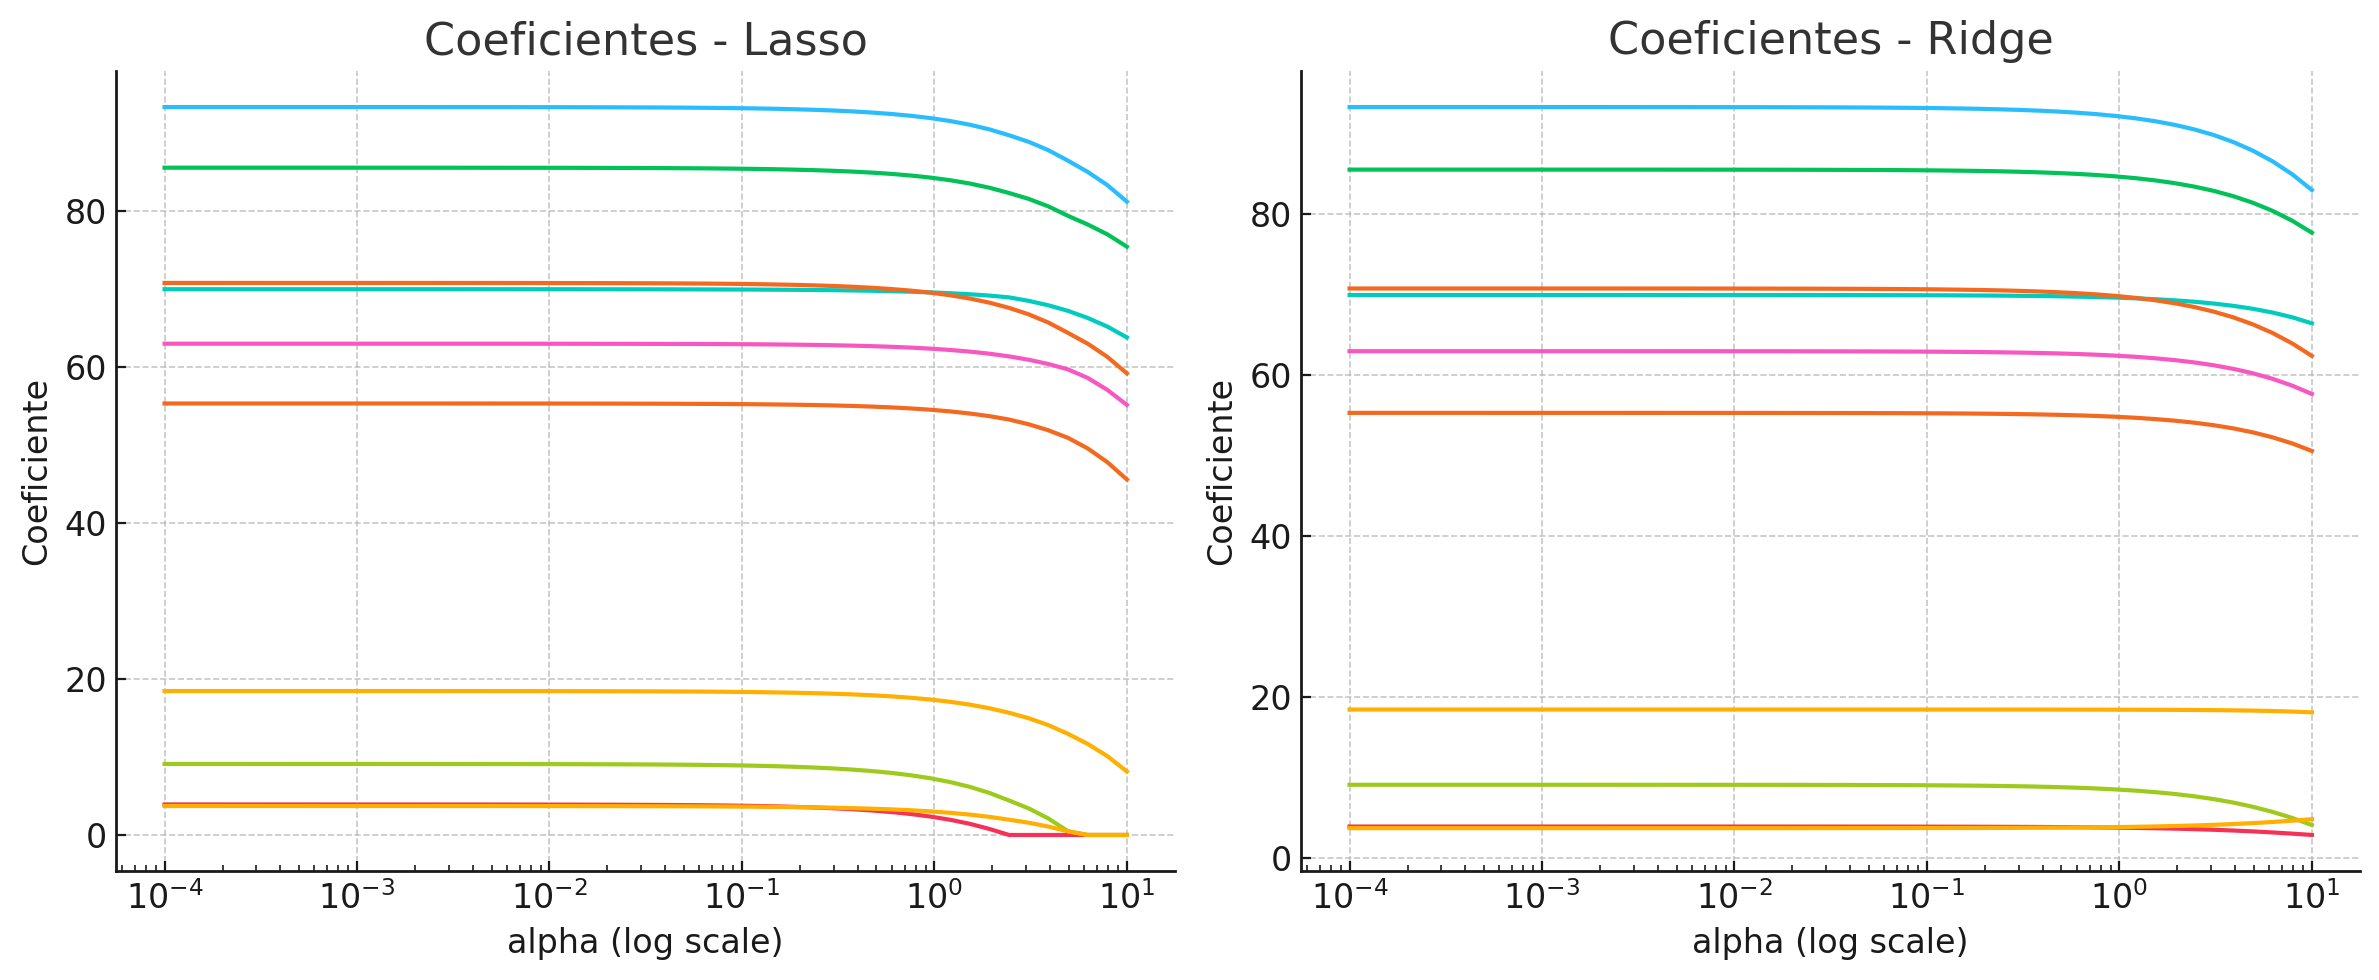

* **Linear Regression (sin regularización):** No tiene un mecanismo de regularización incorporado para la selección de características. Todos los coeficientes se estiman sin penalizaciones, por lo que todas las características se mantienen en el modelo.

Puede construir un modelo LASSO utilizando la clase `Lasso`.

Tenemos 2 variantes, **Lasso** y **LassoCV**:

In [13]:
from sklearn.linear_model import Lasso

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = Lasso()
scoring = 'neg_mean_squared_error'
resultados = cross_val_score(modelo, X_reg, y_reg, cv=kfold, scoring=scoring)
print(f"Neg MSE: {resultados.mean()} ({resultados.std()})")

Neg MSE: -28.745890075851538 (12.001844539883201)


**Lasso:** Es una implementación directa de la regresión LASSO (Least Absolute Shrinkage and Selection Operator). Aquí, el parámetro de regularización alpha debe ser definido por el usuario (debe ser un valor flotante no negativo, por defecto alpha=1.0) . Si no proporcionas un valor adecuado, tendrás que probar diferentes valores manualmente.

In [15]:
from sklearn.linear_model import LassoCV

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = LassoCV()
scoring = 'neg_mean_squared_error'
resultados = cross_val_score(modelo, X_reg, y_reg, cv=kfold, scoring=scoring)
print(f"Neg MSE: {resultados.mean()} ({resultados.std()})")

Neg MSE: -27.65945994644797 (11.527397421630107)


**LassoCV:** Es una variante de LASSO que incorpora validación cruzada automática para encontrar el mejor valor de alpha. En lugar de tener que probar diferentes valores de alpha manualmente, este modelo lo hace automáticamente durante el proceso de entrenamiento. LassoCV ajusta el modelo varias veces, con diferentes valores de alpha, y selecciona el que minimiza el error de validación.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).
</div> 

<a id="section314"></a>
### <font color="#004D7F"> 3.1.4. ElasticNet Regression</font>

ENR es una forma de regresión de regularización que combina las propiedades de RIR y LASSO. Busca minimizar la complejidad del modelo de regresión (magnitud y número de coeficientes de regresión) penalizando el modelo utilizando tanto la norma L2 (suma de los valores cuadráticos de los coeficientes) como la norma L1 (suma de los valores de absolutos de los coeficientes). 

Este modelo es útil cuando se tiene un gran número de características o cuando hay multicolinealidad entre ellas (es decir, alta correlación entre algunas variables).

ElasticNet agrega una penalización mixta. Su función de pérdida es:

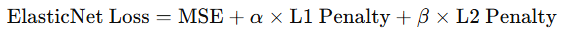

Los parámetros de ajuste son:

* $alpha$ ($α$) controla la fuerza de la regularización.
* $l1$_$ratio$ ($ρ$) permite balancear entre L1 y L2. Cuando L1_ratio = 1, es solo LASSO; cuando L1_ratio = 0, es solo Ridge. Ajustando este parámetro en valores intermedios se puede modificar el modelo para adaptarlo mejor a los datos.

Es ideal cuando ninguna de las técnicas de regularización LASSO o Ridge, por sí solas, brinda buenos resultados, ya que ElasticNet combina ambas. Aprovecha la selección de características de LASSO y la reducción de multicolinealidad de Ridge. ElasticNet es una elección intermedia entre LASSO y Ridge, lo que permite un enfoque más equilibrado para problemas donde ambas regularizaciones son útiles.

Puede construir un modelo ENR utilizando la clase `ElasticNet`.

In [17]:
from sklearn.linear_model import ElasticNet

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = ElasticNet()
scoring = 'neg_mean_squared_error'
resultados = cross_val_score(modelo, X_reg, y_reg, cv=kfold, scoring=scoring)
print(f"Neg MSE: {resultados.mean()} ({resultados.std()})")

Neg MSE: -27.90842036023106 (11.484450217983518)


<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html).
</div> 

<a id="section32"></a>
## <font color="#004D7F"> 3.2. Algoritmos de taxonomía no lineal</font>

Posteriormente, estudiaremos tres algoritmos no lineales:
* $k$-Nearest Neighbors ($k$-NN).
* Classification and Regression Trees (CART). 
* Support Vector Machines (SVM).

<a id="section321"></a>
### <font color="#004D7F"> 3.2.1. $k$-Nearest Neighbours</font>

$k$-NN localiza las $k$ instancias más similares en el conjunto de datos de entrenamiento para una nueva instancia de datos. De los $k$ vecinos, para problemas de regresión, se toma una variable de salida media o mediana como la predicción. Esto quiere decir que, si tienes 5 vecinos (k=5) y sus valores de salida son [10, 12, 15, 11, 14], el modelo tomará la media (12.4) o mediana (12) de estos valores como la predicción para el nuevo dato (*scikit-learn* por defecto usa la media de los valores de salida de los vecinos cercanos). Para problemas de clasificación, en cambio, se toma la clase más común entre los $k$ vecinos.

En el $k$-NN, cada vez que queremos hacer una predicción para un nuevo dato, el algoritmo identifica los $k$ vecinos más cercanos en el conjunto de entrenamiento usando una métrica de distancia, que determina qué tan similares son esos puntos al nuevo punto. Entonces, la distancia se usa solo para encontrar los vecinos; y luego para problemas de regresión, el cálculo de la media o mediana da el valor final.

Cabe destacar la métrica de distancia utilizada (el argumento de la métrica). En *scikit_learn* la distancia de _Minkowski_ se usa por defecto, que es una generalización tanto de la distancia _euclidiana_ (utilizada cuando todas las entradas tienen la misma escala) como de la distancia de _Manhattan_ (para cuando las escalas de las variables de entrada difieren). 

Para dos puntos: $A(x_1,y_1)$ y $B(x_2,y_2)$ en un espacio bidimensional, la fórmula de distancia de _Manhattan_ es:



En dimensiones más altas, simplemente se suman las diferencias absolutas en cada dimensión.

Para dos puntos: $A(x_1,y_1)$ y $B(x_2,y_2)$ en un espacio bidimensional, la fórmula de distancia _euclidiana_ es:

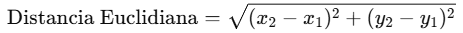

En dimensiones más altas, simplemente se extiende sumando el cuadrado de las diferencias en cada dimensión y sacando la raíz cuadrada:

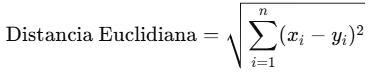

Se dice que la distancia de _Minkowski_ es una generalización tanto de la distancia euclidiana como de la distancia de _Manhattan_ ya que la distancia de _Minkowski_ es una fórmula que engloba tanto la distancia _euclidiana_ como la _Manhattan_. Dependiendo del valor que se elija para el parámetro $p$ en la fórmula de _Minkowski_ (si $p=2$ se obtiene la distancia _euclidiana_, mientras que si $p=1$ se obtiene la distancia de _Manhattan_). En *scikit_learn* el parámetro $p$ por defecto es $p=2$.

Puede construir un modelo de $k$-NN utilizando la clase `KNeighborsRegressor`.

In [20]:
from sklearn.neighbors import KNeighborsRegressor

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
resultados = cross_val_score(modelo, X_reg, y_reg, cv=kfold, scoring=scoring) 
print(f"Neg MSE: {resultados.mean()} ({resultados.std()})")

Neg MSE: -38.852320266666666 (14.660692658624528)


Vemos que el error es mayor al de los algoritmos de taxonomía lineal para problemas de regresión, pero tiene gran cantidad de hiperparámetros que pueden configurarse y reducir el error (pueden verse los hiperparámetros en la documentación oficial de la librería):

In [22]:
from sklearn.neighbors import KNeighborsRegressor

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = KNeighborsRegressor(weights='distance')
scoring = 'neg_mean_squared_error'
resultados = cross_val_score(modelo, X_reg, y_reg, cv=kfold, scoring=scoring) 
print(f"Neg MSE: {resultados.mean()} ({resultados.std()})")

Neg MSE: -35.94513544756194 (12.83120321870905)


Vemos que mejora el rendimiento del modelo al reducirse el error.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).
</div> 

<a id="section322"></a>
### <font color="#004D7F"> 3.2.2. Classification and Regression Trees</font>

Al construir un árbol de decisión para regresión (es decir, CART para regresión), el objetivo es dividir el conjunto de datos en diferentes segmentos o "nodos" de tal manera que cada nodo tenga valores lo más similares posible entre sí. CART usa los datos de entrenamiento para seleccionar los mejores puntos para dividir los datos con el fin de minimizar una métrica de costos. La métrica de costo predeterminada para los árboles de decisión de regresión es el error cuadrático medio, especificado en el parámetro `criterion` (así como lo era la impureza de Gini o el índice de entropía para un árbol de decisión de clasificación). En el contexto de un árbol de regresión, este error mide qué tan cerca están los valores en cada nodo de la media de esos valores. Es decir, CART utiliza el Mean Squared Error (MSE) como métrica de costo para seleccionar divisiones que minimicen la variación dentro de los nodos, dividiendo de manera que se reduzca al máximo la diferencia entre los valores reales y la media de los valores en el nodo. Puede construir un modelo CART utilizando la clase `DecisionTreeRegressor`.

In [45]:
from sklearn.tree import DecisionTreeRegressor

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = DecisionTreeRegressor(random_state=7)
scoring = 'neg_mean_squared_error'
resultados = cross_val_score(modelo, X_reg, y_reg, cv=kfold, scoring=scoring) 
print(f"Neg MSE: {resultados.mean()} ({resultados.std()})")

Neg MSE: -20.00229176470588 (8.400433938168177)


Vemos que el error es menor al de los algoritmos de taxonomía lineal para problemas de regresión. Además también tiene gran cantidad de hiperparámetros que pueden configurarse y reducir el error (pueden verse los hiperparámetros en la documentación oficial de la librería):

In [47]:
from sklearn.tree import DecisionTreeRegressor

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = DecisionTreeRegressor(criterion='absolute_error', random_state=7)
scoring = 'neg_mean_squared_error'
resultados = cross_val_score(modelo, X_reg, y_reg, cv=kfold, scoring=scoring) 
print(f"Neg MSE: {resultados.mean()} ({resultados.std()})")

Neg MSE: -20.288236078431375 (5.986131392961076)


Vemos que si bien el error se incremente levamente, la desviación estándar se reduce. Podríamos considerar en este caso que mejora el rendimiento del modelo.

In [49]:
from sklearn.tree import DecisionTreeRegressor

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = DecisionTreeRegressor(criterion='friedman_mse', random_state=7)
scoring = 'neg_mean_squared_error'
resultados = cross_val_score(modelo, X_reg, y_reg, cv=kfold, scoring=scoring) 
print(f"Neg MSE: {resultados.mean()} ({resultados.std()})")

Neg MSE: -23.559036862745096 (10.811433051622778)


Vemos que no mejora el rendimiento del modelo al incrementarse el error.

In [51]:
from sklearn.tree import DecisionTreeRegressor

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelo = DecisionTreeRegressor(criterion='poisson', random_state=7)
scoring = 'neg_mean_squared_error'
resultados = cross_val_score(modelo, X_reg, y_reg, cv=kfold, scoring=scoring) 
print(f"Neg MSE: {resultados.mean()} ({resultados.std()})")

Neg MSE: -17.856774901960783 (5.662365483907298)


Vemos que mejora notablemente el rendimiento del modelo al reducirse el error.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).
</div> 

<a id="section323"></a>
### <font color="#004D7F"> 3.2.3. Support Vector Machines</font>

SVM se desarrolló para la clasificación binaria. La técnica se ha extendido para los problemas de predicción de valores reales llamados Support Vector Regression (SVR). Al igual que el ejemplo de clasificación, SVR se basa en la biblioteca `LIBSVM`. Puede construir un modelo SVR utilizando la clase `SVR`.

In [119]:
from sklearn.svm import SVR

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
modelo = SVR()
scoring = 'neg_mean_squared_error'
resultados = cross_val_score(modelo, X_reg, y_reg, cv=kfold, scoring=scoring)
print(f"Neg MSE: {resultados.mean()} ({resultados.std()})")

Neg MSE: -67.64140705473743 (26.524654546583477)


Si modificamos algunos hiperparámetros (pueden verse los hiperparámetros en la documentación oficial de la librería):

In [121]:
from sklearn.svm import SVR

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
modelo = SVR(gamma='auto') # Por defecto el gamma es 'scale'. El parámetro controla el coeficiente de kernel para 'rbf', 'poly' y 'sigmoid'.
# Si gamma='scale' (predeterminado), se utiliza "1 / (n_features * X.var())" como valor de gamma.
# Si gamma='auto', se utiliza "1 / n_características".)
scoring = 'neg_mean_squared_error'
resultados = cross_val_score(modelo, X_reg, y_reg, cv=kfold, scoring=scoring)
print(f"Neg MSE: {resultados.mean()} ({resultados.std()})")

Neg MSE: -83.73272794073159 (26.79488794617123)


Vemos que empeora el rendimiento del modelo al aumentar el error.

In [123]:
from sklearn.svm import SVR

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
modelo = SVR(kernel='poly') # Por defecto el kernel es 'rbf'. El parámetro especifica el tipo de núcleo que se utilizará en el algoritmo.
scoring = 'neg_mean_squared_error'
resultados = cross_val_score(modelo, X_reg, y_reg, cv=kfold, scoring=scoring)
print(f"Neg MSE: {resultados.mean()} ({resultados.std()})")

Neg MSE: -67.82602641958218 (26.996314736626324)


Vemos que mejora el rendimiento del modelo al reducirse el error.

In [125]:
from sklearn.svm import SVR

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
modelo = SVR(kernel='sigmoid') # Por defecto el kernel es 'rbf'. El parámetro especifica el tipo de núcleo que se utilizará en el algoritmo.
scoring = 'neg_mean_squared_error'
resultados = cross_val_score(modelo, X_reg, y_reg, cv=kfold, scoring=scoring)
print(f"Neg MSE: {resultados.mean()} ({resultados.std()})")

Neg MSE: -82.4591285040628 (25.037194781872635)


Vemos que empeora el rendimiento del modelo al aumentar el error.

In [127]:
from sklearn.svm import SVR

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
modelo = SVR(kernel='linear') # Por defecto el kernel es 'rbf'. El parámetro especifica el tipo de núcleo que se utilizará en el algoritmo.
scoring = 'neg_mean_squared_error'
resultados = cross_val_score(modelo, X_reg, y_reg, cv=kfold, scoring=scoring)
print(f"Neg MSE: {resultados.mean()} ({resultados.std()})")

Neg MSE: -26.089822681885558 (14.621332062842093)


Vemos que utilizando el kernel de tipo 'lineal' mejora el rendimiento del modelo al reducirse el error. En este caso estamos usando un algoritmo de taxonomía no lineal con un kernel lineal. 

Podemos concluir que este conjunto de datos funciona mejor para algoritmos de taxonomía lineal (de hecho podemos verlo en el error que obtuvimos utilizando dichos algoritmos y los de taxonomía no lineal).

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`SVR`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).
</div> 

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>